<a href="https://colab.research.google.com/github/AnusreeChittineni/VAIL_2021/blob/main/Gender_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading & Preparing Data

In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split

In [3]:
uploaded = files.upload()

Saving age_gender.csv.zip to age_gender.csv.zip


In [4]:
# unzips neccessarry zip files for session
# only needs to be run once
!unzip -uq "/content/age_gender.csv.zip" -d "/content/age_gender.csv"

In [5]:
age_gender_data = pd.read_csv("/content/age_gender.csv/age_gender.csv")
age_gender_data.info()
age_gender_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


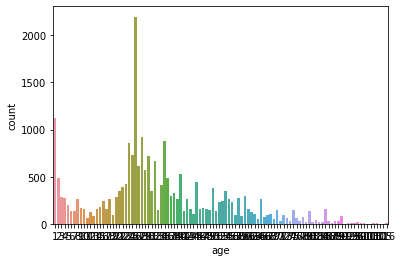

In [6]:
# plots age distribution in dataset
sns.countplot(x='age', data=age_gender_data)

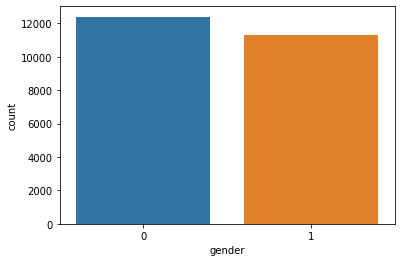

In [7]:
# plots gender distribution in dataset
sns.countplot(x='gender', data=age_gender_data)

### Data Preprocessing

In [8]:
print(age_gender_data.iloc[0,:])

age                                                          1
ethnicity                                                    2
gender                                                       0
img_name                        20161219203650636.jpg.chip.jpg
pixels       129 128 128 126 127 130 133 135 139 142 145 14...
Name: 0, dtype: object


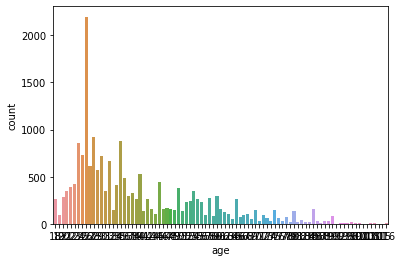

In [9]:
### try with filtering female >=16 & males >=18 ###

# Select only people who are 18 or older
age_gender_data = age_gender_data[age_gender_data['age'] >= 18]

# plots age distribution in  dataset
sns.countplot(x='age', data=age_gender_data)

In [10]:
# resets index values after dropping rows where age < 18
age_gender_data.reset_index(drop=True, inplace=True)
age_gender_data

,age,ethnicity,gender,img_name,pixels
0,100,0,0,20170112213500903.jpg.chip.jpg,203 185 139 163 176 184 186 175 175 156 159 13...
1,100,0,0,20170112215240346.jpg.chip.jpg,125 126 115 78 66 66 77 85 95 102 117 138 138 ...
2,100,0,1,20170110183726390.jpg.chip.jpg,235 164 113 144 121 201 243 237 234 221 233 23...
3,100,0,1,20170112213001988.jpg.chip.jpg,82 82 82 82 82 82 84 86 90 85 104 105 102 154 ...
4,100,0,1,20170112213303693.jpg.chip.jpg,70 72 94 149 154 166 175 169 172 161 176 187 2...
...,...,...,...,...,...
19467,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
19468,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
19469,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
19470,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [11]:
# checks for null data; if there was null data we would have to remove that row
age_gender_data.isnull().sum() 

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [12]:
# Input image configuration
# finds dimesnions of image so we can configure it into an array
num_pixels = len(age_gender_data['pixels'][0].split(' '))
dimension = int(np.sqrt(num_pixels))
img_width = dimension
img_height = dimension

print("Pixels: {}".format(num_pixels))
print("Width: {0}, Height: {1}".format(img_width, img_height))

Pixels: 2304
Width: 48, Height: 48


In [13]:
# Splitting dataset into X and y values
X_img = age_gender_data.iloc[:,4].copy()
y_age = age_gender_data.iloc[:,0].copy()
y_ethnicity = age_gender_data.iloc[:,1].copy()
y_gender = age_gender_data.iloc[:,2].copy()

In [14]:
# splitting the data into train and test sets.
X_train, X_tests, y_train, y_tests = train_test_split(X_img,y_gender,test_size=0.3,random_state=11)

# splitting test set into validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_tests,y_tests,test_size=0.15,random_state=11)

In [15]:
def str_to_npArr(x):
    '''
    Function to convert pixel data (string) into numpy_array of pixels
    '''
    x = x.reset_index(drop=True)

    #converting data to numpy array
    x = x.apply(lambda x: np.array(x.split(), dtype="float32")) 

    return np.array([x[i].reshape(img_width, img_height, 1) for i in range(x.shape[0])])

# Converting the string of pixels into image array for each of train, val and test set and normalization
X_train = str_to_npArr(X_train)
X_test = str_to_npArr(X_test)
X_val = str_to_npArr(X_val)

print("Traget: shape = (16593, 48, 48, 1), type = <class 'numpy.ndarray'>")
print("Current: shape = {}, type = {}".format(X_train.shape, type(X_train)))

Traget: shape = (16593, 48, 48, 1), type = <class 'numpy.ndarray'>
Current: shape = (13630, 48, 48, 1), type = <class 'numpy.ndarray'>


In [20]:
# establishes input and output values
# we are only classifying gender which is why we split data prior
target_columns = ['gender', 'ethnicity', 'age']

age_gender_data_preprocess = age_gender_data.drop('img_name', axis=1)
y = age_gender_data_preprocess[target_columns]
x = age_gender_data_preprocess.drop(target_columns, axis=1)

print(x)
print("--------------------------------------------------------")
print(y)

                                                  pixels
0      203 185 139 163 176 184 186 175 175 156 159 13...
1      125 126 115 78 66 66 77 85 95 102 117 138 138 ...
2      235 164 113 144 121 201 243 237 234 221 233 23...
3      82 82 82 82 82 82 84 86 90 85 104 105 102 154 ...
4      70 72 94 149 154 166 175 169 172 161 176 187 2...
...                                                  ...
19467  127 100 94 81 77 77 74 99 102 98 128 145 160 1...
19468  23 28 32 35 42 47 68 85 98 103 113 117 130 129...
19469  59 50 37 40 34 19 30 101 156 170 177 184 187 1...
19470  45 108 120 156 206 197 140 180 191 199 204 207...
19471  156 161 160 165 170 173 166 177 183 191 187 18...

[19472 rows x 1 columns]
--------------------------------------------------------
       gender  ethnicity  age
0           0          0  100
1           0          0  100
2           1          0  100
3           1          0  100
4           1          0  100
...       ...        ...  ...
19467       1          

In [21]:
#converting data to numpy array
x = x['pixels'].apply(lambda x: np.array(x.split(), dtype="float32")) 

# normalization
x = np.array(x)/255.0 
x = np.array([ x[i].reshape(48,48,1) for i in range(x.shape[0]) ])

print("Traget: X Shape: {}".format(x.shape))
print("Current: X Shape: {}".format(x.shape))

Traget: X Shape: (19472, 48, 48, 1)
Current: X Shape: (19472, 48, 48, 1)


In [23]:
y_gender = np.array(y['gender'])
y_ethnicity = np.array(y['ethnicity'])
y_age = np.array(y['age'])

### Data Visualization

In [25]:
import random
import matplotlib.pyplot as plt # plotting
%matplotlib inline

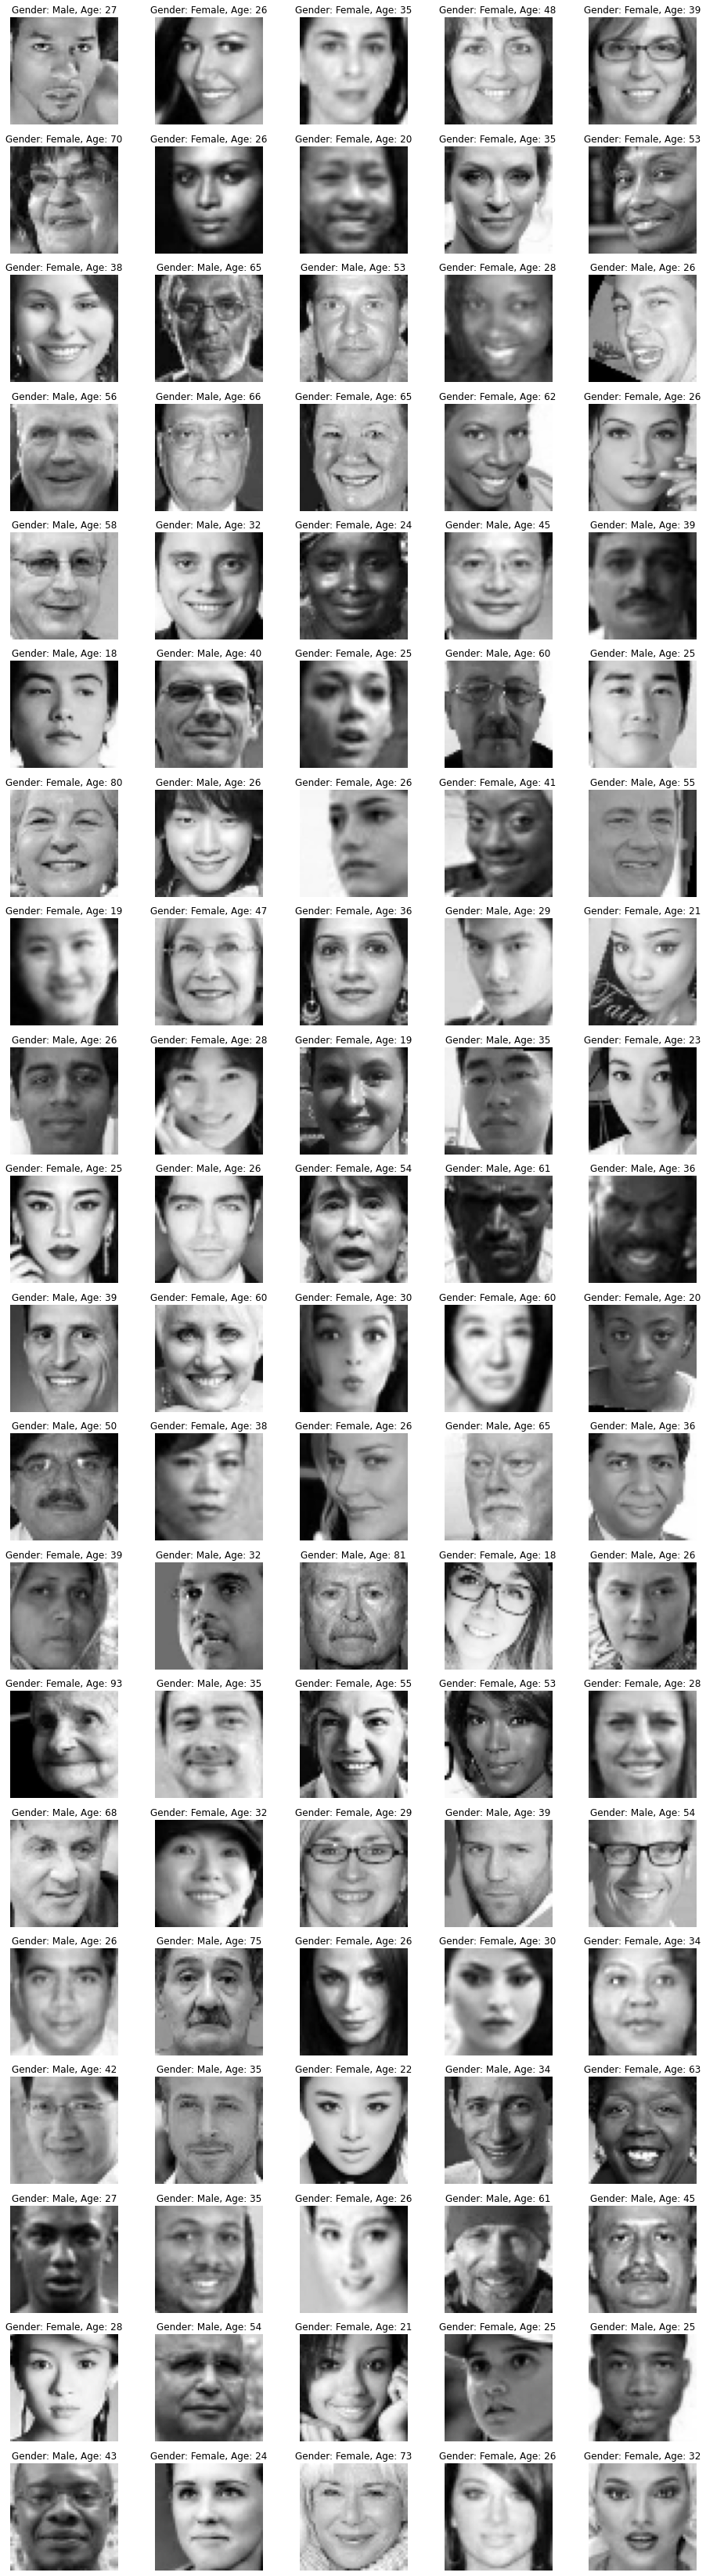

In [26]:
# rows in subplots
rows = 20 

# columns in subplots
cols = 5 

# selects 100 random images to sample
samp = random.sample(range(x.shape[0]),rows*cols)
x_samp = x[samp,:,:,:]
y_samp_gender = y_gender[samp]
y_samp_age = y_age[samp]
    
fig,ax = plt.subplots(rows,cols,figsize=(16,60))
r = 0
c = 0   

for i in range(rows*cols):
    aa = x_samp[i,:,:,:].reshape(48,48)
    ax[r,c].axis("off")
    ax[r,c].imshow(aa,cmap="gray")
    ax[r,c].set_title(f"Gender: {'Female' if y_samp_gender[i]==1 else 'Male'}, Age: {y_samp_age[i]}")
    c+=1
    if c == cols:
        c=0
        r+=1
        
plt.show()

### Image Augmentation

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.random import set_seed

In [32]:
# Generates augmented training data
train_data_gen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=1,
                                    brightness_range=[0.8,1.2],
                                    zoom_range=[0.8,1.2],
                                    rescale=1/255
                                   )

# Generates augmented validation data
val_data_gen = ImageDataGenerator(rescale=1/255)

# Generates augmented testing data
test_data_gen = ImageDataGenerator(rescale=1/255)

In [33]:
set_seed(11)
random.seed(11)
np.random.seed(11)

val_data = val_data_gen.flow(X_val,y_val,
                                   seed=11,shuffle=False)

test_data = test_data_gen.flow(X_test,y_test,
                                   seed=11,shuffle=False)

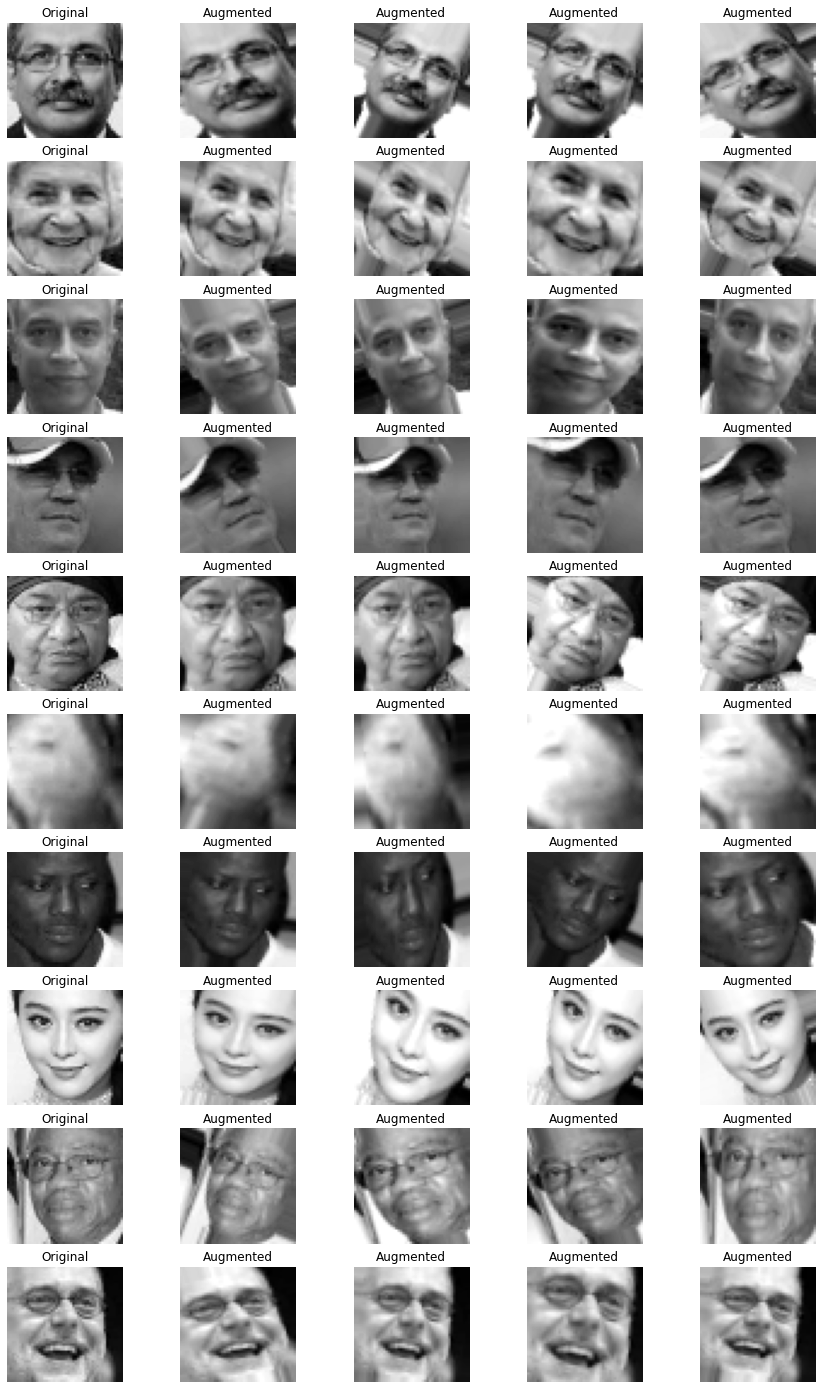

In [35]:
fig,ax = plt.subplots(10,5,figsize=(15,25))
for n in range(10):    
    r = random.sample(range(x.shape[0]),1)[0]
    ax[n,0].imshow(x[r].reshape(48,48),cmap="gray")
    ax[n,0].set_title("Original")
    ax[n,0].axis("off")
    for i in range(1,5):
        ax[n,i].imshow(train_data_gen.random_transform(x[r]).reshape(48,48),cmap="gray")
        ax[n,i].set_title("Augmented")
        ax[n,i].axis("off")
plt.show()

### Training

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from  IPython.display import display
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, experimental, MaxPool2D, BatchNormalization
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.data import Dataset
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow import test

In [39]:
# Model configuration variables
batch_size = 32
img_width, img_height, img_num_channels = 48, 48, 1
# when do we define loss function inputs?
loss_function = sparse_categorical_crossentropy
no_classes = 2
no_epochs = 50
optimizer = Adam()
verbosity = 1
num_folds = 10
activation='softmax'

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)
print(input_shape)

(48, 48, 1)


In [40]:
# Set Seed
random.seed(11)
set_seed(11)
np.random.seed(11)

# Define the K-fold Cross Validator
# If we already defined our validation data, why do we need this?
kfold = KFold(n_splits=num_folds, shuffle=True)

In [42]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(x, y_gender):
    
  # Set Seed
  random.seed(11)
  set_seed(11)
  np.random.seed(11)
  
  # Define the model architecture
  model = Sequential()
  
  model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  for size in [128, 256]:

    model.add(Conv2D(size, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(Conv2D(size, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

  model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
    
  # Ensure the model doesn't overfit
  early_stop = EarlyStopping(monitor="val_loss",patience=5,mode="min") 
  
  # Set Seed
  random.seed(11)
  set_seed(11)
  np.random.seed(11)
    
  # Fit data to model
  history = model.fit(train_data_gen.flow(x[train], y_gender[train], seed=11),
            callbacks=early_stop,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_data=train_data_gen.flow(x[test], y_gender[test],
                                   seed=11))
  
  # Generate generalization metrics
  # I don't understand the graph
  fig = px.line(
  history.history, y=['loss', 'val_loss'],
  labels={'index': 'epoch', 'value': 'loss'}, 
  title='Training History')
  fig.show()
    
  scores = model.evaluate(train_data_gen.flow(x[test], y_gender[test],
                                   seed=11), verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  
  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
548/548 [==============================] - 21s 24ms/step - loss: 0.8991 - accuracy: 0.6930 - val_loss: 0.4540 - val_accuracy: 0.7834
Epoch 2/50
548/548 [==============================] - 12s 22ms/step - loss: 0.3342 - accuracy: 0.8583 - val_loss: 0.3392 - val_accuracy: 0.8578
Epoch 3/50
548/548 [==============================] - 12s 23ms/step - loss: 0.2971 - accuracy: 0.8783 - val_loss: 0.2660 - val_accuracy: 0.8984
Epoch 4/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2587 - accuracy: 0.9003 - val_loss: 0.2296 - val_accuracy: 0.9122
Epoch 5/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2401 - accuracy: 0.9062 - val_loss: 0.3571 - val_accuracy: 0.8563
Epoch 6/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2355 - accuracy: 0.9094 - val_loss: 0.2844 - val_accuracy: 0.8917
Epoch 7/50
548/548 [===================

Score for fold 1: loss of 0.21165820956230164; accuracy of 91.94045066833496%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/50
548/548 [==============================] - 14s 23ms/step - loss: 0.9322 - accuracy: 0.6240 - val_loss: 0.8429 - val_accuracy: 0.5821
Epoch 2/50
548/548 [==============================] - 12s 22ms/step - loss: 0.4495 - accuracy: 0.7999 - val_loss: 0.4100 - val_accuracy: 0.8085
Epoch 3/50
548/548 [==============================] - 13s 24ms/step - loss: 0.3541 - accuracy: 0.8536 - val_loss: 0.3072 - val_accuracy: 0.8783
Epoch 4/50
548/548 [==============================] - 12s 22ms/step - loss: 0.3128 - accuracy: 0.8679 - val_loss: 0.2875 - val_accuracy: 0.8886
Epoch 5/50
548/548 [==============================] - 12s 23ms/step - loss: 0.2866 - accuracy: 0.8857 - val_loss: 0.3271 - val_accuracy: 0.8650
Epoch 6/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2624 - accuracy: 0.8956 - v

Score for fold 2: loss of 0.2222539484500885; accuracy of 91.58110618591309%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/50
548/548 [==============================] - 14s 24ms/step - loss: 0.8657 - accuracy: 0.6632 - val_loss: 0.5434 - val_accuracy: 0.6846
Epoch 2/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3898 - accuracy: 0.8296 - val_loss: 0.3281 - val_accuracy: 0.8706
Epoch 3/50
548/548 [==============================] - 12s 22ms/step - loss: 0.3299 - accuracy: 0.8660 - val_loss: 0.2960 - val_accuracy: 0.8865
Epoch 4/50
548/548 [==============================] - 12s 22ms/step - loss: 0.2905 - accuracy: 0.8807 - val_loss: 0.3307 - val_accuracy: 0.8613
Epoch 5/50
548/548 [==============================] - 12s 23ms/step - loss: 0.2707 - accuracy: 0.8908 - val_loss: 0.3369 - val_accuracy: 0.8552
Epoch 6/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2638 - accuracy: 0.8958 - va

Score for fold 3: loss of 0.15580394864082336; accuracy of 94.35028433799744%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/50
548/548 [==============================] - 13s 23ms/step - loss: 0.8381 - accuracy: 0.6646 - val_loss: 0.5771 - val_accuracy: 0.6867
Epoch 2/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3724 - accuracy: 0.8421 - val_loss: 0.3358 - val_accuracy: 0.8598
Epoch 3/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3139 - accuracy: 0.8699 - val_loss: 0.3802 - val_accuracy: 0.8372
Epoch 4/50
548/548 [==============================] - 12s 23ms/step - loss: 0.2844 - accuracy: 0.8857 - val_loss: 0.2943 - val_accuracy: 0.8798
Epoch 5/50
548/548 [==============================] - 12s 22ms/step - loss: 0.2676 - accuracy: 0.8964 - val_loss: 0.2723 - val_accuracy: 0.8880
Epoch 6/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2401 - accuracy: 0.9086 - v

Score for fold 4: loss of 0.19439394772052765; accuracy of 92.70672798156738%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/50
548/548 [==============================] - 13s 23ms/step - loss: 0.9040 - accuracy: 0.6510 - val_loss: 0.6514 - val_accuracy: 0.6251
Epoch 2/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3775 - accuracy: 0.8362 - val_loss: 0.3206 - val_accuracy: 0.8675
Epoch 3/50
548/548 [==============================] - 13s 24ms/step - loss: 0.3161 - accuracy: 0.8684 - val_loss: 0.2761 - val_accuracy: 0.8896
Epoch 4/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2879 - accuracy: 0.8839 - val_loss: 0.2525 - val_accuracy: 0.8993
Epoch 5/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2696 - accuracy: 0.8947 - val_loss: 0.3709 - val_accuracy: 0.8382
Epoch 6/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2475 - accuracy: 0.9030 - v

Score for fold 5: loss of 0.18502038717269897; accuracy of 93.47714185714722%
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/50
548/548 [==============================] - 14s 23ms/step - loss: 0.8858 - accuracy: 0.6470 - val_loss: 1.0222 - val_accuracy: 0.5372
Epoch 2/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3955 - accuracy: 0.8273 - val_loss: 0.3197 - val_accuracy: 0.8665
Epoch 3/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3345 - accuracy: 0.8584 - val_loss: 0.2906 - val_accuracy: 0.8772
Epoch 4/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3033 - accuracy: 0.8739 - val_loss: 0.2682 - val_accuracy: 0.8860
Epoch 5/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2705 - accuracy: 0.8922 - val_loss: 0.2651 - val_accuracy: 0.8880
Epoch 6/50
548/548 [==============================] - 12s 23ms/step - loss: 0.2601 - accuracy: 0.8950 - v

Score for fold 6: loss of 0.2215244323015213; accuracy of 91.3199782371521%
------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/50
548/548 [==============================] - 14s 24ms/step - loss: 0.8927 - accuracy: 0.6442 - val_loss: 0.6876 - val_accuracy: 0.6189
Epoch 2/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3846 - accuracy: 0.8314 - val_loss: 0.3551 - val_accuracy: 0.8500
Epoch 3/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3352 - accuracy: 0.8611 - val_loss: 0.3338 - val_accuracy: 0.8511
Epoch 4/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2948 - accuracy: 0.8790 - val_loss: 0.2755 - val_accuracy: 0.8814
Epoch 5/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2734 - accuracy: 0.8884 - val_loss: 0.2783 - val_accuracy: 0.8870
Epoch 6/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2605 - accuracy: 0.8946 - val

Score for fold 7: loss of 0.16052845120429993; accuracy of 94.65844631195068%
------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/50
548/548 [==============================] - 14s 24ms/step - loss: 0.8836 - accuracy: 0.6534 - val_loss: 0.6007 - val_accuracy: 0.6759
Epoch 2/50
548/548 [==============================] - 13s 24ms/step - loss: 0.4117 - accuracy: 0.8204 - val_loss: 0.4901 - val_accuracy: 0.7735
Epoch 3/50
548/548 [==============================] - 13s 24ms/step - loss: 0.3279 - accuracy: 0.8641 - val_loss: 0.2798 - val_accuracy: 0.8860
Epoch 4/50
548/548 [==============================] - 13s 24ms/step - loss: 0.2857 - accuracy: 0.8859 - val_loss: 0.2837 - val_accuracy: 0.8916
Epoch 5/50
548/548 [==============================] - 13s 24ms/step - loss: 0.2656 - accuracy: 0.8930 - val_loss: 0.3255 - val_accuracy: 0.8649
Epoch 6/50
548/548 [==============================] - 13s 24ms/step - loss: 0.2440 - accuracy: 0.9050 - v

Score for fold 8: loss of 0.17255017161369324; accuracy of 93.8366711139679%
------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/50
548/548 [==============================] - 14s 24ms/step - loss: 0.8175 - accuracy: 0.6816 - val_loss: 0.7385 - val_accuracy: 0.6117
Epoch 2/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3735 - accuracy: 0.8450 - val_loss: 0.3255 - val_accuracy: 0.8685
Epoch 3/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3233 - accuracy: 0.8649 - val_loss: 0.2849 - val_accuracy: 0.8829
Epoch 4/50
548/548 [==============================] - 13s 24ms/step - loss: 0.2873 - accuracy: 0.8828 - val_loss: 0.2743 - val_accuracy: 0.8865
Epoch 5/50
548/548 [==============================] - 13s 24ms/step - loss: 0.2670 - accuracy: 0.8930 - val_loss: 0.2428 - val_accuracy: 0.9060
Epoch 6/50
548/548 [==============================] - 13s 24ms/step - loss: 0.2480 - accuracy: 0.9008 - va

Score for fold 9: loss of 0.21686804294586182; accuracy of 91.47406220436096%
------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/50
548/548 [==============================] - 14s 24ms/step - loss: 0.9321 - accuracy: 0.6519 - val_loss: 0.6499 - val_accuracy: 0.6703
Epoch 2/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3989 - accuracy: 0.8262 - val_loss: 0.2940 - val_accuracy: 0.8757
Epoch 3/50
548/548 [==============================] - 13s 24ms/step - loss: 0.3215 - accuracy: 0.8658 - val_loss: 0.2947 - val_accuracy: 0.8814
Epoch 4/50
548/548 [==============================] - 13s 23ms/step - loss: 0.3023 - accuracy: 0.8776 - val_loss: 0.2424 - val_accuracy: 0.9091
Epoch 5/50
548/548 [==============================] - 13s 24ms/step - loss: 0.2730 - accuracy: 0.8883 - val_loss: 0.2434 - val_accuracy: 0.9158
Epoch 6/50
548/548 [==============================] - 13s 23ms/step - loss: 0.2540 - accuracy: 0.8984 - 

Score for fold 10: loss of 0.2267342060804367; accuracy of 90.80637097358704%


In [45]:
# Set Seed
random.seed(11)
set_seed(11)
np.random.seed(11)
  
# Define the model architecture
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

for size in [128, 256]:

  model.add(Conv2D(size, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(Conv2D(size, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
            optimizer=optimizer,
            metrics=['accuracy'])

Final_train = np.append(X_train, X_val, axis=0)
Final_val = np.append(y_train, y_val, axis=0)
final_training_data = train_data_gen.flow(Final_train, Final_val,
                                   seed=11)

random.seed(11)
set_seed(11)
np.random.seed(11)
final_model_history = model.fit(train_data_gen.flow(x, y_gender, seed=11),batch_size=32,epochs=20, validation_data=val_data)

Epoch 1/20
609/609 [==============================] - 15s 23ms/step - loss: 0.8792 - accuracy: 0.6584 - val_loss: 0.5098 - val_accuracy: 0.7374
Epoch 2/20
609/609 [==============================] - 13s 22ms/step - loss: 0.3822 - accuracy: 0.8307 - val_loss: 0.2931 - val_accuracy: 0.8816
Epoch 3/20
609/609 [==============================] - 13s 22ms/step - loss: 0.3126 - accuracy: 0.8724 - val_loss: 0.2444 - val_accuracy: 0.9047
Epoch 4/20
609/609 [==============================] - 13s 22ms/step - loss: 0.2839 - accuracy: 0.8881 - val_loss: 0.2351 - val_accuracy: 0.9118
Epoch 5/20
609/609 [==============================] - 13s 22ms/step - loss: 0.2576 - accuracy: 0.8969 - val_loss: 0.2121 - val_accuracy: 0.9215
Epoch 6/20
609/609 [==============================] - 13s 22ms/step - loss: 0.2320 - accuracy: 0.9076 - val_loss: 0.2347 - val_accuracy: 0.9134
Epoch 7/20
609/609 [==============================] - 13s 22ms/step - loss: 0.2189 - accuracy: 0.9154 - val_loss: 0.3286 - val_accuracy:

In [46]:
# Generate generalization metrics
fig = px.line(
final_model_history.history, y=['loss', 'val_loss'],
labels={'index': 'epoch', 'value': 'val_loss'}, 
title='Training History')
fig.show()


# Generate generalization metrics
fig = px.line(
final_model_history.history, y=['accuracy', 'val_accuracy'],
labels={'index': 'epoch', 'value': 'accuracy'}, 
title='Training History')
fig.show()

In [47]:
pwd

'/content'

In [48]:
model.save("backup")

INFO:tensorflow:Assets written to: backup/assets


### Testing

In [49]:
# Metrics
model.evaluate(test_data)

28/28 [==============================] - 0s 9ms/step - loss: 0.0911 - accuracy: 0.9715


[0.09109282493591309, 0.9714937210083008]

In [50]:
y_pred = model.predict_classes(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       468
           1       0.97      0.97      0.97       409

    accuracy                           0.97       877
   macro avg       0.97      0.97      0.97       877
weighted avg       0.97      0.97      0.97       877



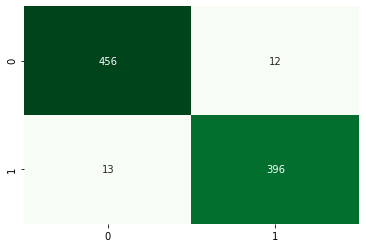

In [52]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d')

### Error Analysis

In [58]:
import cv2

In [59]:
# finding error indices
error_index = (y_test != y_pred)
y_test_error = y_test[error_index]
X_test_error = X_test[error_index]
prediction_error = y_pred[error_index]

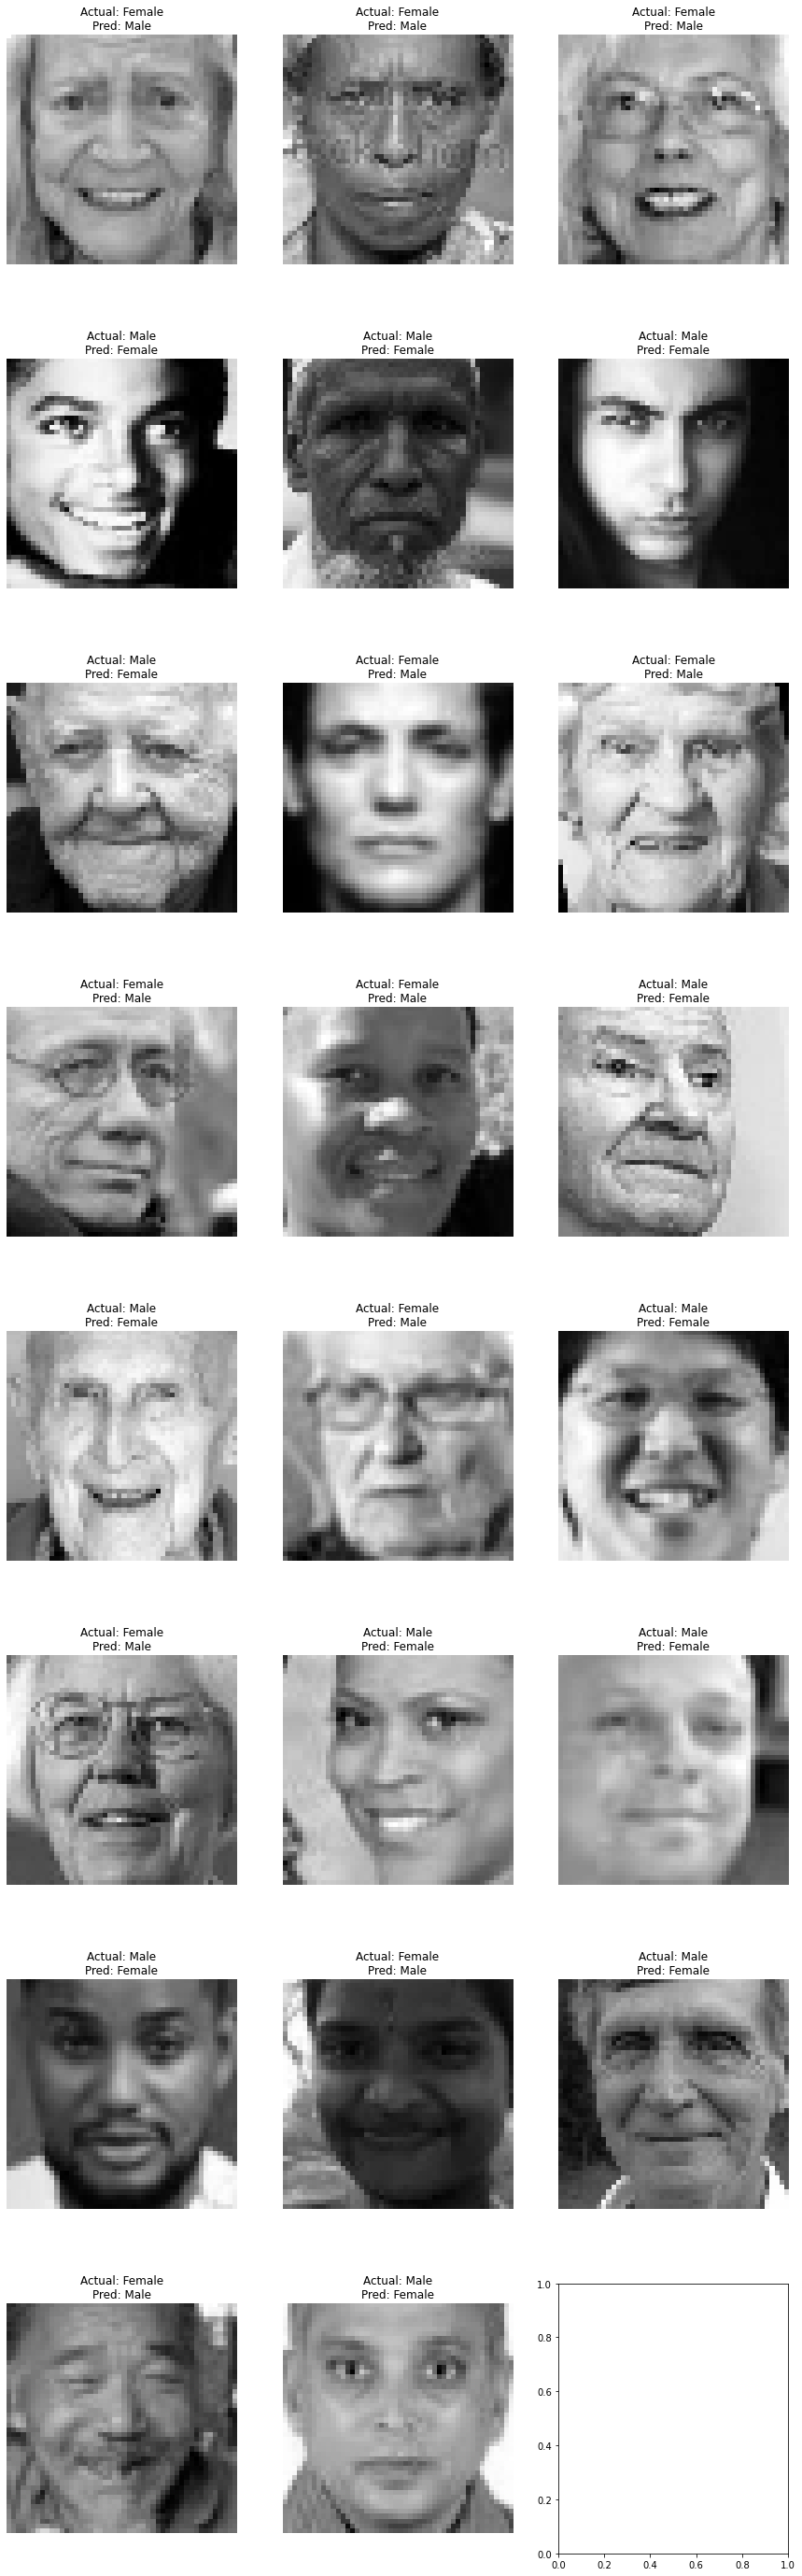

In [60]:
#rows in subplots
rows=int(np.floor(sum(error_index)/3)) 
#columns in subplots
cols=3 
x_samp = X_test_error
y_samp = y_test_error

# plots incorrect predictions
fig,ax = plt.subplots(rows,cols,figsize=(15,50))
r = 0
c = 0
for i in range((rows*cols)-1):
    aa = x_samp[i].reshape(48,48)
    ax[r,c].axis("off")
    ax[r,c].imshow(aa,cmap="gray")
    actual_lab = "Female" if y_samp.iloc[i]==1 else "Male"
    pred_lab = "Female" if int(prediction_error[i])==1 else "Male"
    ax[r,c].set_title(f'Actual: {actual_lab}\nPred: {pred_lab}')
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()